<a href="https://colab.research.google.com/github/devendradeore13/Data-Structure-using-Java/blob/main/Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import bs4 as bs
import urllib.request
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import warnings

In [ ]:
warnings.filterwarnings(action='ignore')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
scrapped_data = urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article = scrapped_data.read()
parsed_article = bs.BeautifulSoup(article, 'lxml')
paragraphs = parsed_article.find_all('p')
article_text = ""

for p in paragraphs:
    article_text += p.text

article_text = article_text.lower()
article_text

'machine learning (ml) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance.[2]\nml finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] the application of ml to business problems is known as predictive analytics.\nstatistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. data mining is a related field of study, focusing on exploratory data analysis (eda) via unsupervised learning.[6][7]\nfrom a theoretical viewpoint, probably approximately correct (pac) learning provides a framework for describing machine learning.\nthe term mach

In [ ]:
article_text = 'machine learning (ml) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance.[2]\nml finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] the application of ml to business problems is known as predictive analytics.\nstatistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. data mining is a related field of study, focusing on exploratory data analysis (eda) via unsupervised learning.[6][7]\nfrom a theoretical viewpoint, probably approximately correct (pac) learning provides a framework for describing machine learning.\nthe term machine learning was coined in 1959 by arthur samuel, an ibm employee and pioneer in the field of computer gaming and artificial intelligence.'

In [ ]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', article_text)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()

In [ ]:
all_sent = nltk.sent_tokenize(sentences)
all_words = [nltk.word_tokenize(sent) for sent in all_sent]

In [ ]:
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [ ]:
data_for_cbow = []
window_size = 2

for sentence in all_words:
    for i in range(window_size, len(sentence) - window_size):
        context = []

        for j in range(-window_size, window_size + 1):
            if j != 0:
                context.append(sentence[i + j])
        target = sentence[i]
        data_for_cbow.append((context, target))



In [ ]:
print("First 5 context-target pairs:")
for pair in data_for_cbow[:5]:
    print(f"Context: {pair[0]}, Target: {pair[1]}")


First 5 context-target pairs:
Context: ['machine', 'learning', 'field', 'artificial'], Target: ml
Context: ['learning', 'ml', 'artificial', 'intelligence'], Target: field
Context: ['ml', 'field', 'intelligence', 'concerned'], Target: artificial
Context: ['field', 'artificial', 'concerned', 'development'], Target: intelligence
Context: ['artificial', 'intelligence', 'development', 'algorithms'], Target: concerned


In [ ]:

model_cbow = Word2Vec(sentences=all_words, vector_size=52, window=window_size, min_count=1, sg=0)

test_word = 'field'
similar_words = model_cbow.wv.most_similar(test_word)

print(f"\nWords similar to '{test_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")


Words similar to 'field':
algorithms: 0.3375158905982971
used: 0.27382099628448486
nlp: 0.16394390165805817
development: 0.10355915874242783
concerned: 0.0689716711640358
including: 0.04343871772289276
analytics: 0.03573742136359215
applications: 0.0016843685880303383
learn: -0.007532699964940548
learning: -0.06905292719602585


In [ ]:

# Step 3: Train CBOW Model
# Build the Word2Vec model with CBOW architecture
model_cbow = Word2Vec(sentences=all_words, vector_size=52, window=window_size, min_count=1, sg=0)

# Access the vocabulary using .key_to_index (Gensim 4.0+)
vocabulary = model_cbow.wv.key_to_index
print("Vocabulary:", vocabulary)


Vocabulary: {'ml': 0, 'analytics': 1, 'predictive': 2, 'learning': 3, 'field': 4, 'artificial': 5, 'intelligence': 6, 'concerned': 7, 'development': 8, 'algorithms': 9, 'learn': 10, 'data': 11, 'used': 12, 'many': 13, 'applications': 14, 'including': 15, 'nlp': 16, 'computer': 17, 'vision': 18, 'machine': 19}


In [ ]:

# Step 4: Output Similar Words
# Find and display similar words for a given word
test_word = ['data','ml']
similar_words = model_cbow.wv.most_similar(test_word)

print(f"\nWords similar to '{test_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")



Words similar to '['data', 'ml']':
artificial: 0.3017711639404297
learning: 0.28719982504844666
many: 0.26291289925575256
concerned: 0.2034730464220047
including: 0.1810341477394104
development: 0.1516435146331787
intelligence: 0.11360019445419312
algorithms: 0.06392448395490646
machine: 0.05640894174575806
learn: 0.04304548352956772


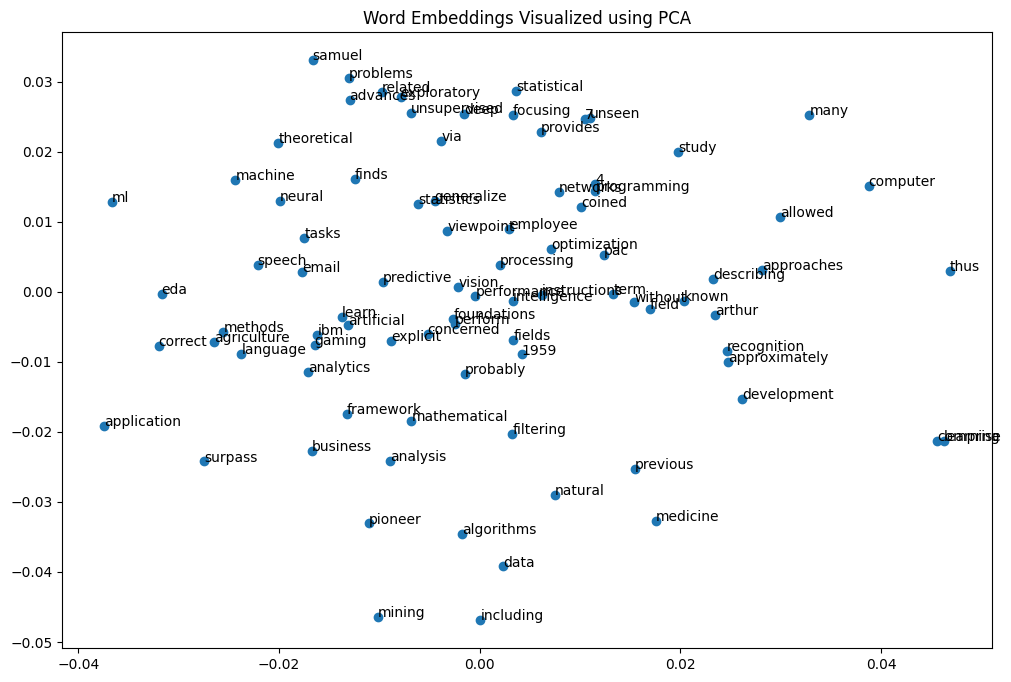

In [ ]:
# Step 5: Visualize Word Embeddings
# Prepare for PCA visualization
X = model_cbow.wv.vectors  # Get the word vectors
pca = PCA(n_components=2)  # Create a PCA instance
result = pca.fit_transform(X)  # Fit and transform the vectors

# Plot the 2D PCA projection of the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])
words = list(model_cbow.wv.key_to_index)  # List of words in the vocabulary
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings Visualized using PCA")
plt.show()

In [2]:
import numpy as np
import re
import bs4 as bs
import urllib.request
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings(action='ignore')

nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Scrape and Preprocess Text Data
scrapped_data = urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article = scrapped_data.read()
parsed_article = bs.BeautifulSoup(article, 'lxml')
paragraphs = parsed_article.find_all('p')
article_text = ""

for p in paragraphs:
    article_text += p.text

# Clean and preprocess the text
article_text = article_text.lower()
article_text = re.sub('[^A-Za-z0-9 ]+', '', article_text)  # Remove special characters
article_text = re.sub(r'\b\w\b', '', article_text).strip()  # Remove single-letter words

# Tokenize sentences and words
all_sent = nltk.sent_tokenize(article_text)
all_words = [nltk.word_tokenize(sent) for sent in all_sent]

# Remove stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

# Step 2: Generate Training Data for CBOW
data_for_cbow = []
window_size = 2

for sentence in all_words:
    for i in range(window_size, len(sentence) - window_size):
        context = [sentence[i + j] for j in range(-window_size, window_size + 1) if j != 0]
        target = sentence[i]
        data_for_cbow.append((context, target))

# Display first 5 context-target pairs
print("First 5 context-target pairs:")
for pair in data_for_cbow[:5]:
    print(f"Context: {pair[0]}, Target: {pair[1]}")

# Flatten each context-target pair into a format suitable for Word2Vec
flattened_sentences = [[*context, target] for context, target in data_for_cbow]

# Build the Word2Vec model
model_cbow = Word2Vec(sentences=flattened_sentences, vector_size=52, window=window_size, min_count=1, sg=0)

# Step 3: Find similar words for a test word
test_word = 'field'
if test_word in model_cbow.wv:
    similar_words = model_cbow.wv.most_similar(test_word)
    print(f"\nWords similar to '{test_word}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")
else:
    print(f"'{test_word}' not found in vocabulary.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 context-target pairs:
Context: ['machine', 'learning', 'field', 'study'], Target: ml
Context: ['learning', 'ml', 'study', 'artificial'], Target: field
Context: ['ml', 'field', 'artificial', 'intelligence'], Target: study
Context: ['field', 'study', 'intelligence', 'concerned'], Target: artificial
Context: ['study', 'artificial', 'concerned', 'development'], Target: intelligence

Words similar to 'field':
machine: 0.9833070039749146
learning: 0.9829280972480774
model: 0.9828967452049255
data: 0.9818643927574158
may: 0.9774011969566345
used: 0.9771748185157776
example: 0.9770613312721252
often: 0.976993978023529
algorithms: 0.9765574336051941
models: 0.9762171506881714
